In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pImpactR.util import naff

In [2]:
fint = 0.5
dx = 1.0e-11
dy = 1.0e-11
DP = np.array([-2,-1,0,1,2])*1.0e-6

In [3]:
def changeFINT(fint):
    file=open('iota.seq','r')
    lines = file.readlines()
    file.close()
    lines[0]='fintval = '+str(fint)+';\n'
    file=open('iota.seq','w')
    file.writelines(lines)
    file.close()
    
changeFINT(fint)

In [4]:
def changeOffset(dx,dy,dp):
    file=open('run.madx','r')
    lines = file.readlines()
    file.close()
    lines[0]='dpt='+str(dp)+';\n'
    lines[1]='dx='+str(dx)+';\n'
    lines[2]='dy='+str(dy)+';\n'
    file=open('run.madx','w')
    file.writelines(lines)
    file.close()

def runMadX(dx,dy,dp):
    changeOffset(dx,dy,dp)
    os.system('madx < run.madx')
    data = np.loadtxt('track.obs0001.p0001',skiprows=8)
    X = data[:,2] - 1j*data[:,3]
    Y = data[:,4] - 1j*data[:,5]
    return X,Y

In [5]:
TuneX = [0]*len(DP)
TuneY = [0]*len(DP)
n=0
for dp in DP:
    X,Y = runMadX(dx,dy,dp)
    TuneX[n],amp,data = naff(1,X)
    TuneY[n],amp,data = naff(1,Y)
    n=n+1
    
print('nux=',TuneX[int(len(DP)/2)])
print('nuy=',TuneY[int(len(DP)/2)])
print('chx=',(TuneX[-1]-TuneX[0])/(DP[-1]-DP[0]))
print('chy=',(TuneY[-1]-TuneY[0])/(DP[-1]-DP[0]))

nux= [0.30002851]
nuy= [0.30002241]
chx= [2.40753082]
chy= [0.24474038]


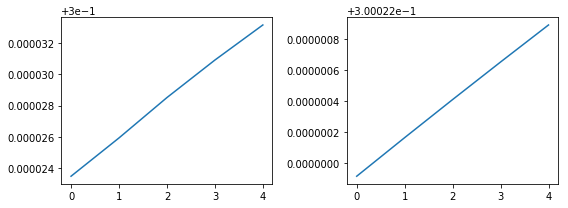

In [6]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(TuneX)
plt.subplot(1,2,2)
plt.plot(TuneY)
plt.tight_layout()